In [6]:
import numpy as np
import matplotlib.pyplot as plt
from dat_hea_reader import *
from eeg_avg import *

In [4]:
path_realizacion = r'datos_ejemplo\N1_evoked_raw_100_F1_R1'
fs, trials, comments = read_trials(path_realizacion)

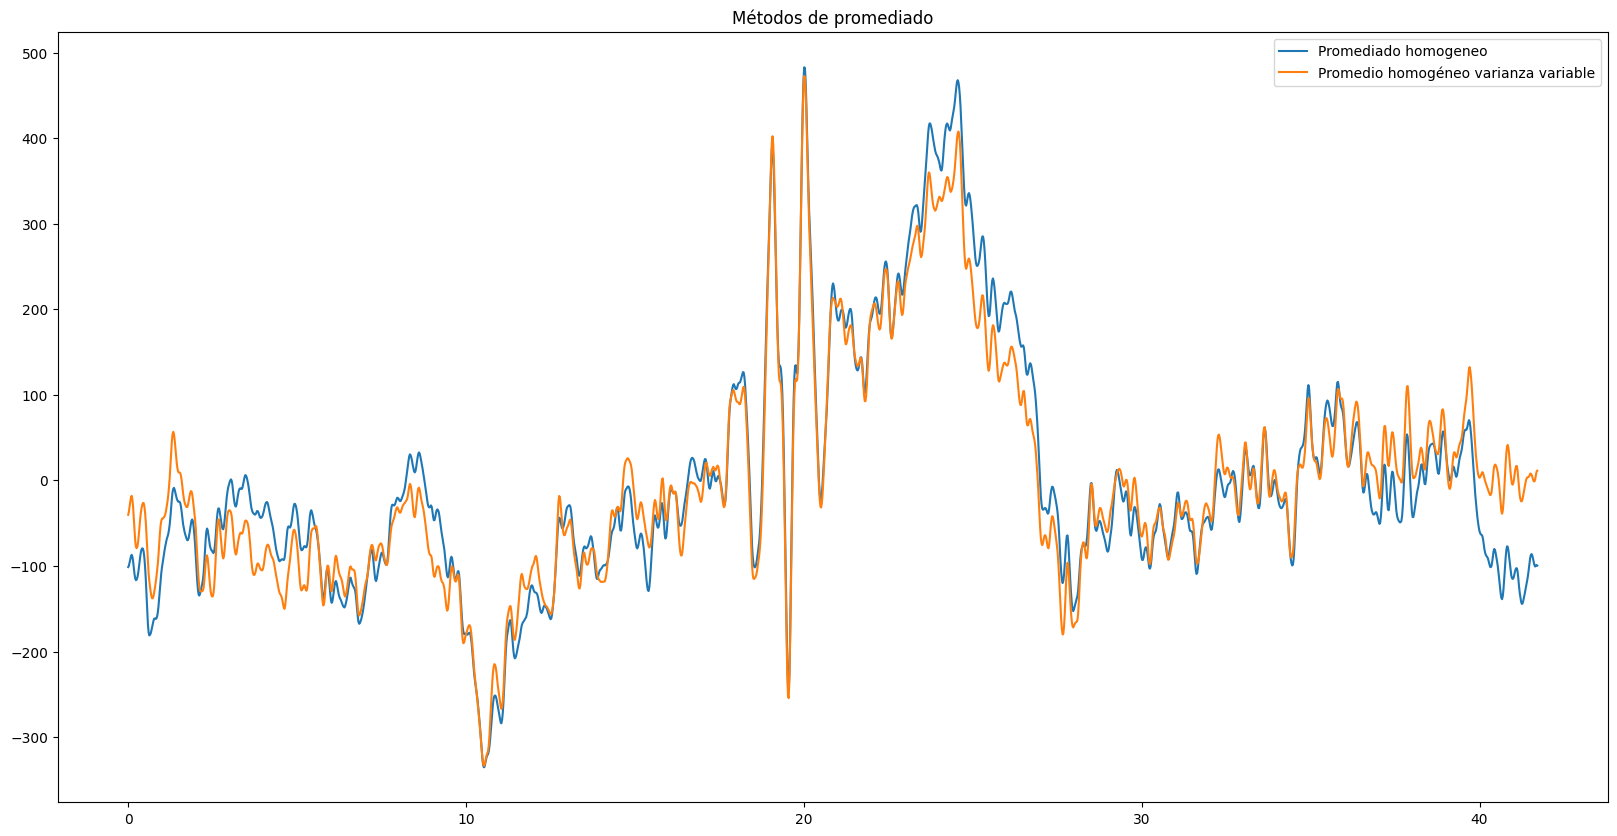

In [8]:
tr_len = comments['Trial Length (samples)']
t = np.linspace(0, tr_len/fs, tr_len)*1000 # convert to ms
trials_mean = average_EEG(trials, mode='homogenous') 
trials_amp = average_EEG(trials, mode='amp')
trials_var = average_EEG(trials, mode='var')
trials_both = average_EEG(trials, mode='both')

plt.figure(figsize = (20,10))
plt.plot(t, trials_mean, label='Promediado homogeneo')
#plt.plot(t, trials_amp, label='Promedio inhomogéneo amplitud variable')
plt.plot(t, trials_var, label='Promedio homogéneo varianza variable')
#plt.plot(t, trials_both, label='Promedio inhomogéneo todo variable')
plt.title('Métodos de promediado')
plt.legend()
plt.show()